**Machine Learning TP03 – Régression Linéaire**
TREMONT-RAIMI julien 
Ethan TOMASO

# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Charge le fichier CSV
df = pd.read_csv("Ecommerce_Customers.csv")
#affiche les 5 premières lignes pour avoir un aperçu des données.
print(df.head())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [2]:
df.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)
df.shape

(500, 5)

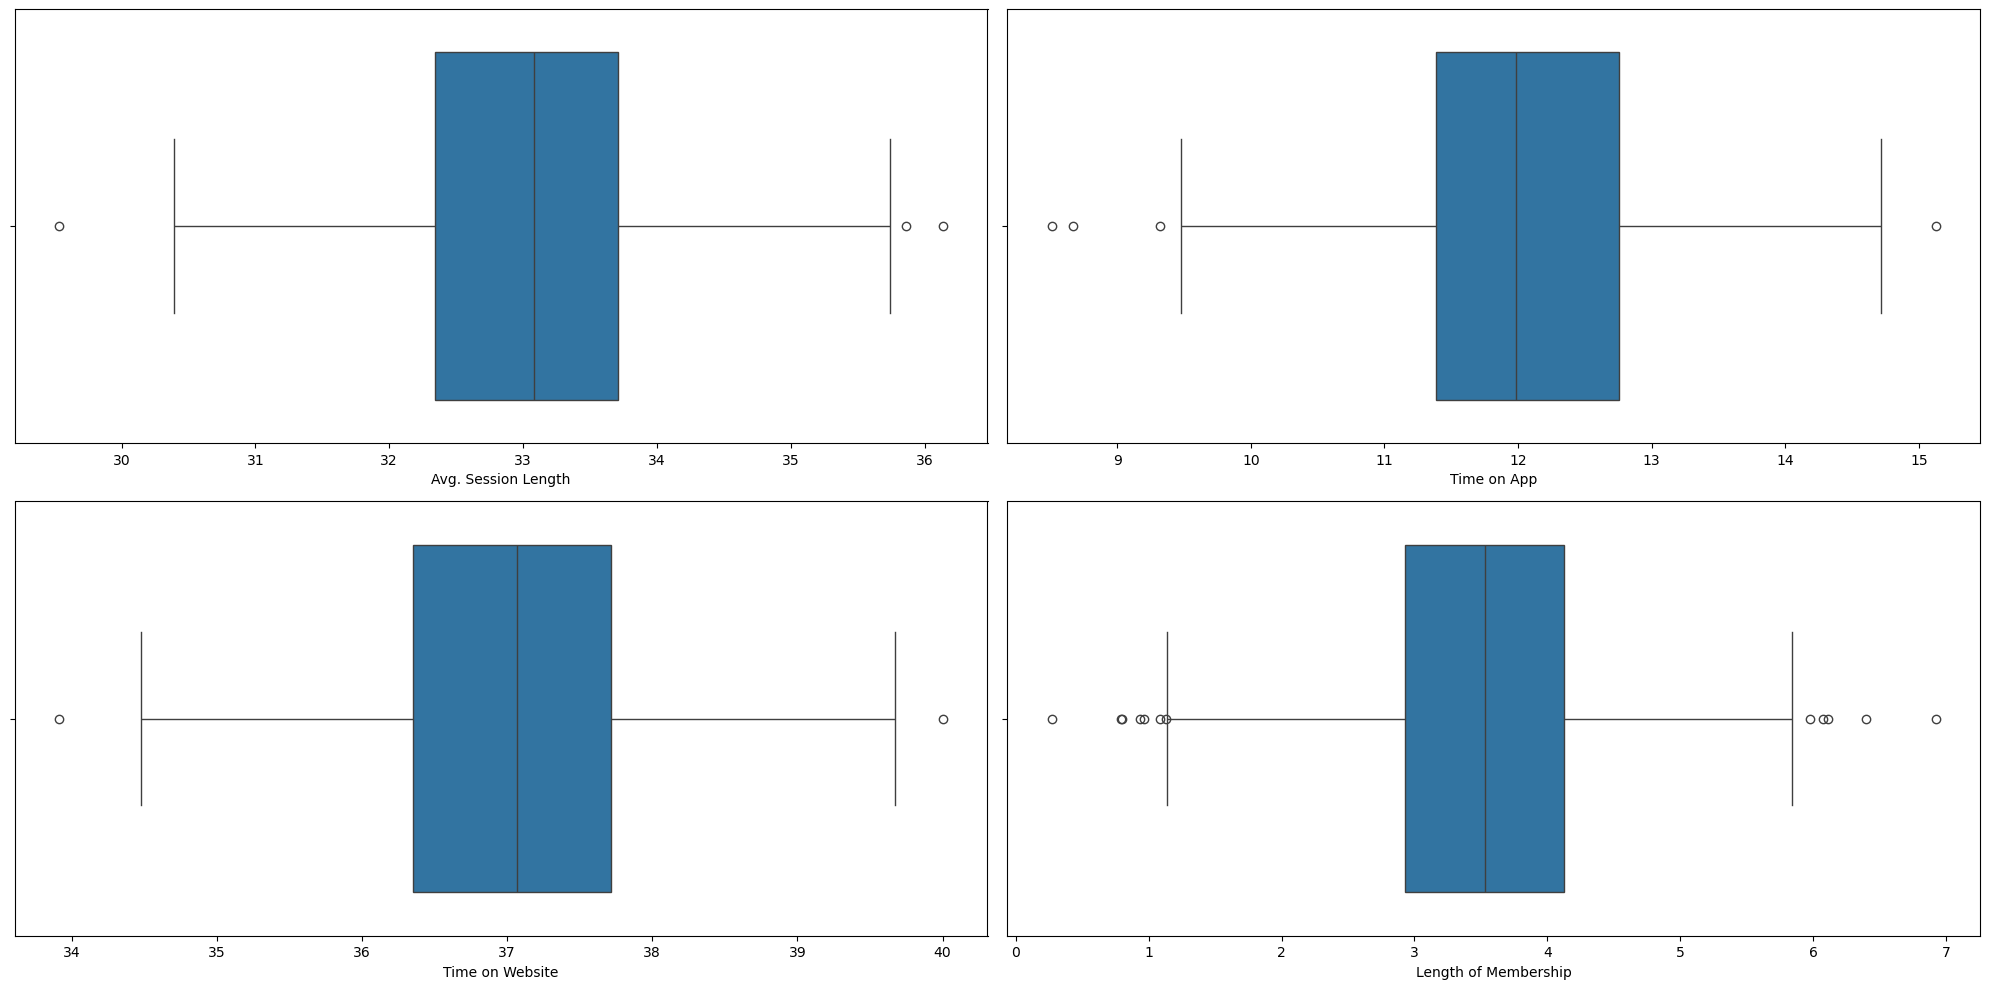

In [3]:
num_vars = ['Avg. Session Length' , 'Time on App',  'Time on Website',  'Length of Membership']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

# Data Preprocessing

In [8]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [9]:
df.dtypes

Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [14]:
for var in num_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[var] < (Q1 - 1.5 * IQR)) | (df[var] > (Q3 + 1.5 * IQR)))]

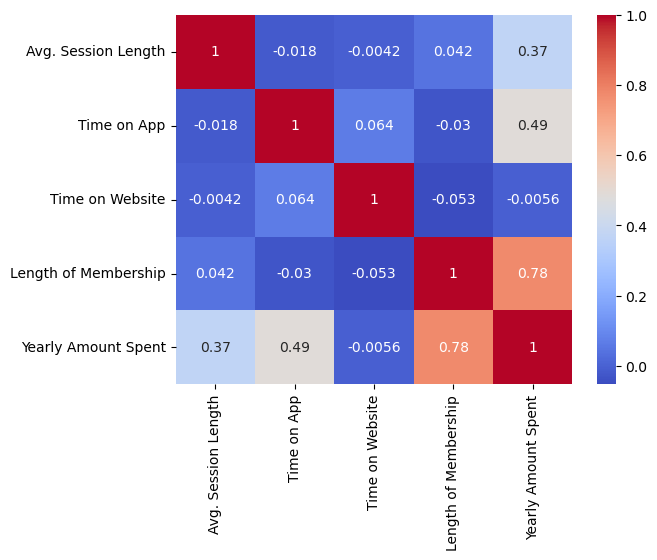

In [11]:
# Calcule la corrélation entre toutes les variables
corr = df.corr()
# Affiche une heatmap (carte de chaleur) avec les valeurs de corrélation annotées
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [ ]:
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']

#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)